MUQING WEN, ZHOUYI QIAN
Spring 2023
CS 443: Bio-inspired Machine Learning
Week 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import tensorflow as tf

import preprocess
import word2vec

import som

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

OSError: 'seaborn-v0_8-colorblind' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

load the email data set into dataset we can use

In [2]:
FOLDER_PATH = 'data/enron/spam'
num_emails = 20
targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(FOLDER_PATH, num_emails)

Use Skip-gram to create word embeddings for the email dataset

In [3]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 20
C = vocab_sz
batch_sz = 11

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

dev_targets_int = targets_int[0:10]
dev_contexts_int = contexts_int[0:10]
hist_1 = net.fit(dev_targets_int, dev_contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=400, print_every=50, verbose=True)

Metal device set to: Apple M1 Pro
Starting to train network ....
Epoch 0/400, Training Loss: 19.16%.


2023-04-13 13:36:16.874031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-13 13:36:16.874215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 50/400, Training Loss: 5.00%.
Epoch 100/400, Training Loss: 3.82%.
Epoch 150/400, Training Loss: 3.67%.
Epoch 200/400, Training Loss: 3.65%.
Epoch 250/400, Training Loss: 3.64%.
Epoch 300/400, Training Loss: 3.63%.
Epoch 350/400, Training Loss: 3.63%.


plot the training loss on the dev dataset

In [4]:
def plot_train_loss(train_loss, title="Training Loss for Skip-gram", n_samps=None, batch_sz=None):
    x_train = []

    for i in range(len(train_loss)):
        i_epoch = int(i/ (n_samps / batch_sz))
        x_train.append(i_epoch)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

    axes.plot(x_train, train_loss, ".g-", markersize=5, label="Train Loss")

    # Axes.set_xlabel(xlabel)
    axes.set_xlabel("Training Epochs")
    axes.set_ylabel("Loss")

    # axes.set_xticks(x_list)
    axes.set_xticklabels(axes.get_xticks(), rotation=0)

    # frameon: Whether the legend should be drawn on a patch (frame).
    axes.legend(loc="lower left", bbox_to_anchor=(1, 0), frameon=True, edgecolor="black")

    axes.set_title(title)
    plt.show()

/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_2988/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


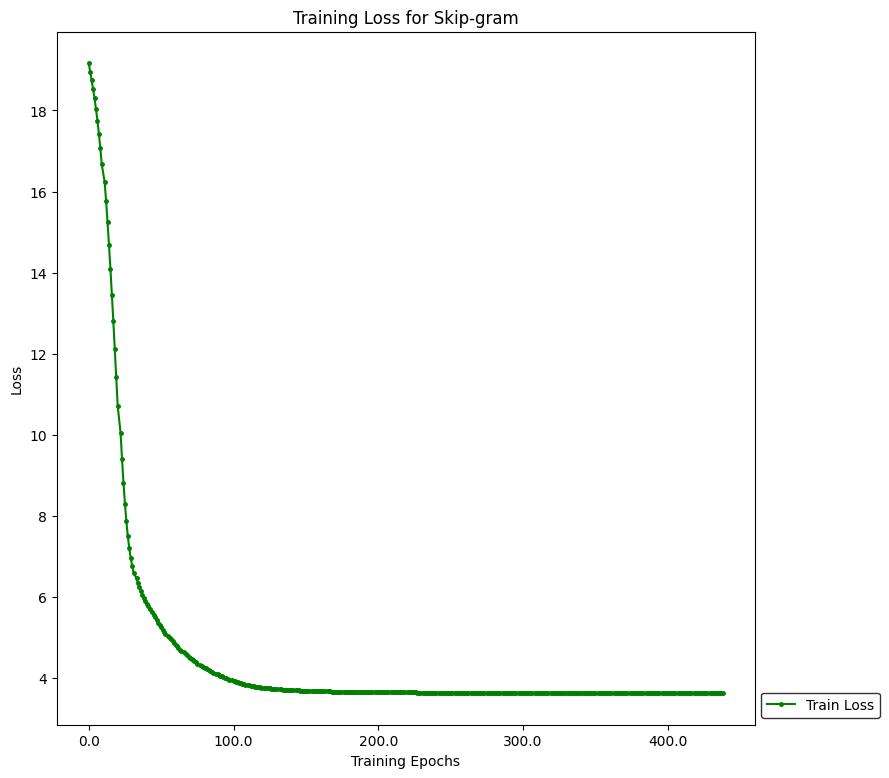

In [5]:
plot_train_loss(hist_1, n_samps=dev_targets_int.shape[0], batch_sz=batch_sz)